In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: afreenhossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:55<00:00, 20.5MB/s]


In [4]:
train = "/content/dogs-vs-cats/train"
test = "/content/dogs-vs-cats/test"

In [5]:
import os

In [6]:
os.listdir(train)

['cats', 'dogs']

In [9]:
train_cat = os.listdir(train + "/cats")
train_dog = os.listdir(train + "/dogs")

test_cat = os.listdir(test + "/cats")
test_dog = os.listdir(test + "/dogs")

In [11]:
train_cat[:5], test_cat[:5], train_dog[:5], test_dog[:5]

(['cat.6997.jpg',
  'cat.10037.jpg',
  'cat.5803.jpg',
  'cat.11890.jpg',
  'cat.1108.jpg'],
 ['cat.10201.jpg',
  'cat.11632.jpg',
  'cat.5023.jpg',
  'cat.5078.jpg',
  'cat.10654.jpg'],
 ['dog.2272.jpg',
  'dog.2602.jpg',
  'dog.5759.jpg',
  'dog.12406.jpg',
  'dog.7987.jpg'],
 ['dog.11044.jpg',
  'dog.10124.jpg',
  'dog.10939.jpg',
  'dog.8681.jpg',
  'dog.1386.jpg'])

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

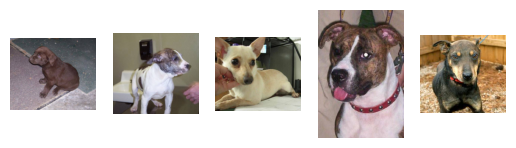

In [16]:
for idx, image_name in enumerate(os.listdir(train + "/dogs")[:5]):
  img_path = os.path.join(train, "dogs", image_name)
  img = Image.open(img_path)

  plt.subplot(1, 5, idx + 1)
  plt.imshow(img)
  plt.axis('off')

plt.show()

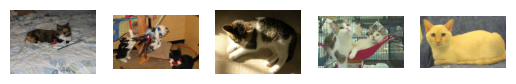

In [17]:
for idx, image_name in enumerate(os.listdir(train + "/cats")[:5]):
  img_path = os.path.join(train, "cats", image_name)
  img = Image.open(img_path)

  plt.subplot(1, 5, idx + 1)
  plt.imshow(img)
  plt.axis('off')

plt.show()

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [19]:
data_dir = '/content/dogs-vs-cats'

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [20]:
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'test': datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms['test'])
}

In [21]:
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True),
    'test': DataLoader(image_datasets['test'], batch_size=32, shuffle=False)
}

In [22]:
class_names = image_datasets['train'].classes

class_names

['cats', 'dogs']

In [23]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 20000
     Root location: /content/dogs-vs-cats/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'test': Dataset ImageFolder
     Number of datapoints: 5000
     Root location: /content/dogs-vs-cats/test
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [24]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x79156f3b95d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x79156f3b9630>}

In [26]:
for idx, (inputs, labels) in enumerate(dataloaders['train']):
  print(inputs.shape)
  print(labels.shape)
  break

torch.Size([32, 3, 224, 224])
torch.Size([32])


In [28]:
from torchvision.utils import make_grid
import numpy as np

In [29]:
def imshow(inp, title=None):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  if title is not None:
    plt.title(title)

  plt.axis('off')
  plt.show()

Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
0


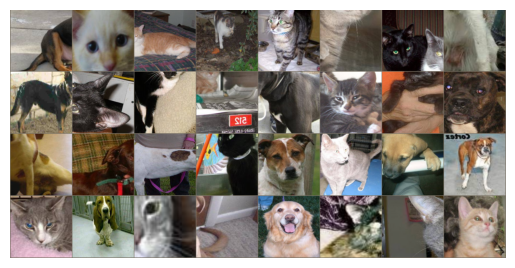

In [32]:
for idx, (inputs, labels) in enumerate(dataloaders['train']):
  print(f"Input shape: {inputs.shape}")
  print(f"Labels shape: {labels.shape}")
  print(idx)

  out = make_grid(inputs, nrow=8)  # Create a grid of 8 images per row
  imshow(out)
  break

In [35]:
weights = models.MobileNet_V2_Weights.DEFAULT
model = models.mobilenet_v2(weights=weights)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 117MB/s]


In [36]:
model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [37]:
weights

MobileNet_V2_Weights.IMAGENET1K_V2

In [38]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [39]:
model.classifier[1]

Linear(in_features=1280, out_features=1000, bias=True)

In [40]:
model.last_channel

1280

In [41]:
model.classifier[1] = nn.Linear(model.last_channel, 2)

In [42]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=2, bias=True)
)

In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [44]:
model = model.to(device)

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [49]:
from timeit import default_timer as timer

def train_model(model, dataloaders, criterion, optimizer, num_epochs):
  start_time = timer()

  best_acc = 0.0
  best_model_wts = model.state_dict()

  for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'test']:
      if phase == "train":
        model.train()
      else:
        model.eval()

      running_loss = 0.0
      running_corrects = 0

      for inputs, labels in dataloaders[phase]:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(phase == 'train'):
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

          # Backward pass and optimize only in the training phase
          if phase == 'train':
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(dataloaders[phase].dataset)
    epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

    print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    if phase == 'test' and epoch_acc > best_acc:
      best_acc = epoch_acc
      best_model_wts = model.state_dict()


    end_time = timer()

    total_time = end_time - start_time
    print(f'\nTraining completed in {total_time // 60:.0f}m {total_time % 60:.0f}s')
    print(f'Best validation accuracy: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)

    return model

In [50]:
model = train_model(model, dataloaders, criterion, optimizer, num_epochs=10)

Epoch 1/10
----------
Test Loss: 0.0817 Acc: 0.9676

Training completed in 2m 47s
Best validation accuracy: 0.9676


In [54]:
import matplotlib.pyplot as plt
from PIL import Image

def imshow(inp, title=None):
  """Helper function to display an image with matplotlib."""
  inp = inp.numpy().transpose((1, 2, 0))  # Convert from tensor to numpy
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean  # Unnormalize
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  if title is not None:
      plt.title(title)
  plt.axis('off')

def predict_image(image_path, actual_label, model, class_names):
  image = Image.open(image_path)
  transform = data_transforms['test']
  image_tensor = transform(image).unsqueeze(0).to(device)

  # Make prediction
  model.eval()
  with torch.no_grad():
      outputs = model(image_tensor)
      _, preds = torch.max(outputs, 1)

  predicted_label = class_names[preds[0]]

  plt.figure(figsize=(6, 6))
  imshow(transform(image).cpu())
  plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
  plt.show()

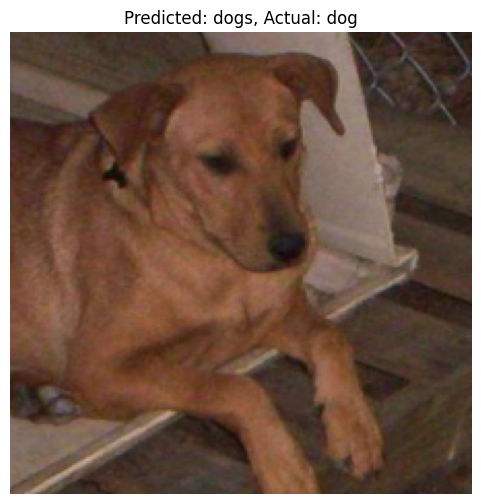

In [55]:
img_path = '/content/dogs-vs-cats/test/dogs/dog.100.jpg'
actual_label = 'dog'

predict_image(img_path, actual_label, model, class_names)

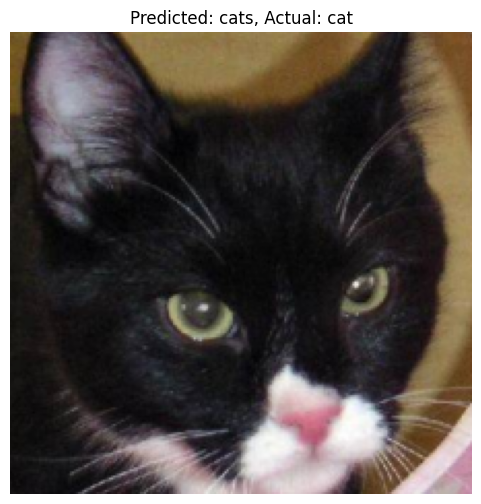

In [57]:
img_path = '/content/dogs-vs-cats/test/cats/cat.10001.jpg'
actual_label = 'cat'

predict_image(img_path, actual_label, model, class_names)

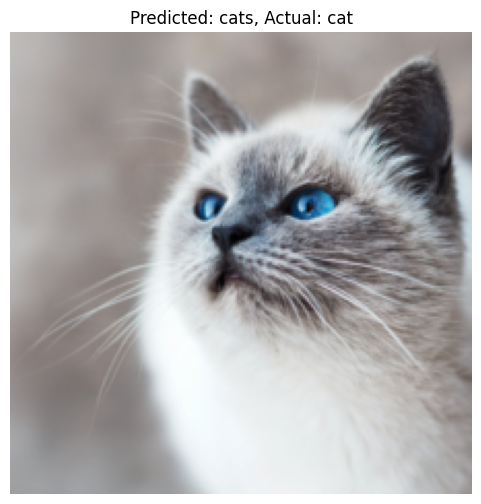

In [58]:
img_path = "/content/cat_test_unsplash.jpg"
actual_label = "cat"

predict_image(img_path, actual_label, model, class_names)

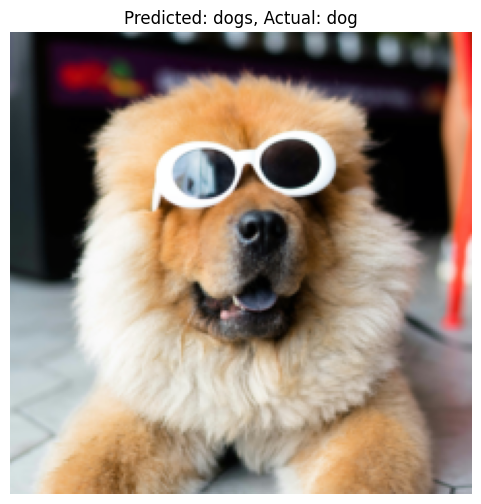

In [59]:
img_path = "/content/dog_test_unsplash.jpg"
actual_label = "dog"

predict_image(img_path, actual_label, model, class_names)

In [60]:
model_save_path = '/content/mobilenet_dogs_vs_cats.pth'
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to /content/mobilenet_dogs_vs_cats.pth
